In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

%matplotlib inline
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('husl')

In [2]:
Blue = '#4285FA'
Red = '#EA4335'
Yellow = '#FBBC05'
Green = '#34A853'

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Target variable manipulation

#### The target variable is loan_status with 2 values of fully paid and charged off. We will transform the column into binary of 1s and 0s for the model. 0 = Fully Paid, 1 = Charged Off(Default) 

In [5]:
# Rename the target column to binary 1 = Fully Paid, 0 = Default
df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1}, inplace=True)

In [6]:
df = df.rename(columns={'loan_status': 'is_default'})

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,is_default,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,0,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,1,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.open_acc.value_counts()

9.0     36779
10.0    35441
8.0     35137
11.0    32695
7.0     31328
        ...  
76.0        2
56.0        2
58.0        1
90.0        1
57.0        1
Name: open_acc, Length: 61, dtype: int64

In [9]:
df.is_default.value_counts()

0    318357
1     77673
Name: is_default, dtype: int64

Text(0.5, 0.98, 'Paid vs Default rate of Loan Borrower ')

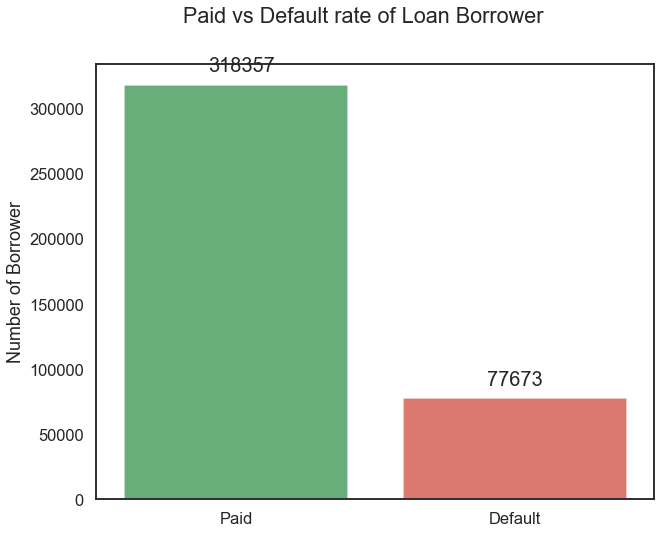

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(df.is_default, palette={0:Green, 1:Red}, alpha=0.8)

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+10000, i.get_height(), fontsize=20)

ax.set_xticklabels(['Paid', 'Default'])
ax.set_ylabel('Number of Borrower')
ax.set_xlabel('')
fig.suptitle('Paid vs Default rate of Loan Borrower ')

In [11]:
# Compute default ratio
per_default = 100 * len(df[df.is_default == 1]) / df.shape[0]
print(f'Default percentage: {per_default:.2f}%')

Default percentage: 19.61%


In [12]:
per_paid = 100 * len(df[df.is_default ==0]) / df.shape[0]
print(f'Fully Paid percentage: {per_paid:.2f}%')

Fully Paid percentage: 80.39%


#### The default is really high at 1/5 of total Lending Club Loans

### Data Cleaning

In [13]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,is_default,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,0,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,1,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [14]:
# Checking for duplicated observations
dup = df[df.duplicated()]
dup

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,is_default,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [15]:
# Number of unique variables for categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
purpose                    14
title                   48817
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

### Examine Job Title

In [16]:
emp_title_def = df[df.is_default==1]

In [17]:
data_emp = pd.DataFrame(emp_title_def.emp_title.value_counts()).reset_index()

In [18]:
data_emp.rename(columns={'index': 'Job title', 'emp_title':'count'}, inplace=True)

In [19]:
data_emp = data_emp.nlargest(5, 'count')

Text(0.5, 0.98, 'Default Rate by Job Title')

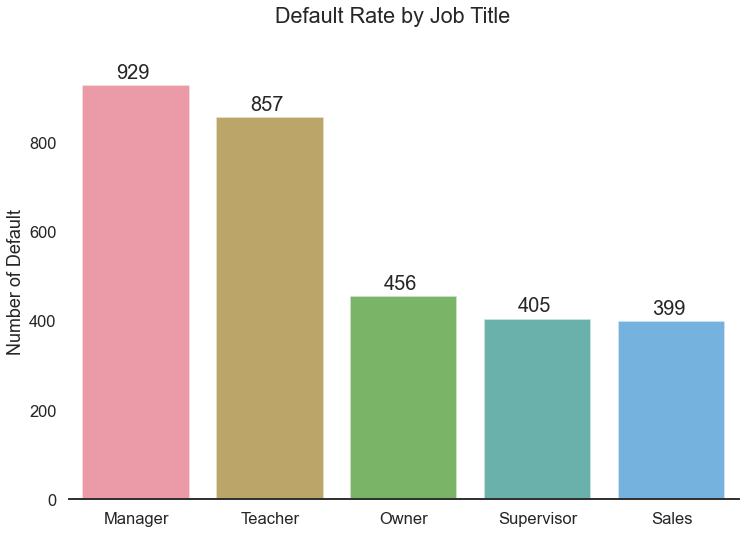

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Job title', y='count', data=data_emp, alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Number of Default')

for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+15, str(int(i.get_height())), fontsize=20)

sns.despine(left=True)
fig.suptitle('Default Rate by Job Title')

### Examine the loan purpose 

In [21]:
# Top 3 loan purpose resulted a default is Debt consolidation, credit card refinancing and other. 
df.query('is_default==1').title.value_counts().sort_values(ascending=False)

Debt consolidation                 35088
Credit card refinancing             9927
Other                               3031
Home improvement                    2899
Debt Consolidation                  1730
                                   ...  
Bills pay off                          1
Cut Debt                               1
HOME IMPROVEMENT PROJECT               1
getting caught up on everything        1
This is my ticket!!!                   1
Name: title, Length: 9576, dtype: int64

In [30]:
# Top 3 loan purpose is debt consolidation, credit card refinancing and home improvement
title = df.groupby('title').filter(lambda x: len(x) >= 10000).title.value_counts()
title

Consolidation    192145
Other            132463
Refinancing       52256
Improvement       19166
Name: title, dtype: int64

In [23]:
# We want to see the ratio of loan purpose where it has the words 'consolidation & refinancing' to the entire default
#purpose 
consol_re_words = len(df[((df.title.str.contains('consolidation')) & (df.is_default ==1))|
       ((df.title.str.contains('refinancing')) & (df.is_default ==1))|
       ((df.title.str.contains('Consolidation')) & (df.is_default == 1))
])
consol_re_words

50940

In [24]:
# Total default observation
de = len(df[df.is_default==1])
print(f'Ratio of Default by words: {consol_re_words/de}')


Ratio of Default by words: 0.6558263489243367


The title column would be a important feature for the model

In [25]:
df.title.isnull().sum()

1755

In [26]:
# Impute missing values as Missing as there could be no reason for the loan, or human errors
df['title'] = df.title.fillna('Missing')
df.title.isnull().sum()

0

In [27]:
# Return most popular words into 4 categories
def transform_title(x):
    if 'consolidation' in x.lower():
        return 'Consolidation'
    elif 'refinancing' in x.lower():
        return 'Refinancing'
    elif 'improvement' in x.lower():
        return 'Improvement'
    else:
        return "Other"

In [28]:
df['title'] = df['title'].apply(lambda x: transform_title(x))

In [29]:
df.title.value_counts()

Consolidation    192145
Other            132463
Refinancing       52256
Improvement       19166
Name: title, dtype: int64

In [30]:
title_def = df[df.is_default==1]

data_title = pd.DataFrame(title_def.title.value_counts()).reset_index()
data_title

,index,title
0,Consolidation,41172
1,Other,22990
2,Refinancing,10000
3,Improvement,3511


In [31]:
data_title['%_default'] = round(data_title.title.div(de)*100,1)

In [32]:
data_title

,index,title,%_default
0,Consolidation,41172,53.0
1,Other,22990,29.6
2,Refinancing,10000,12.9
3,Improvement,3511,4.5


In [33]:
from matplotlib.patches import Patch

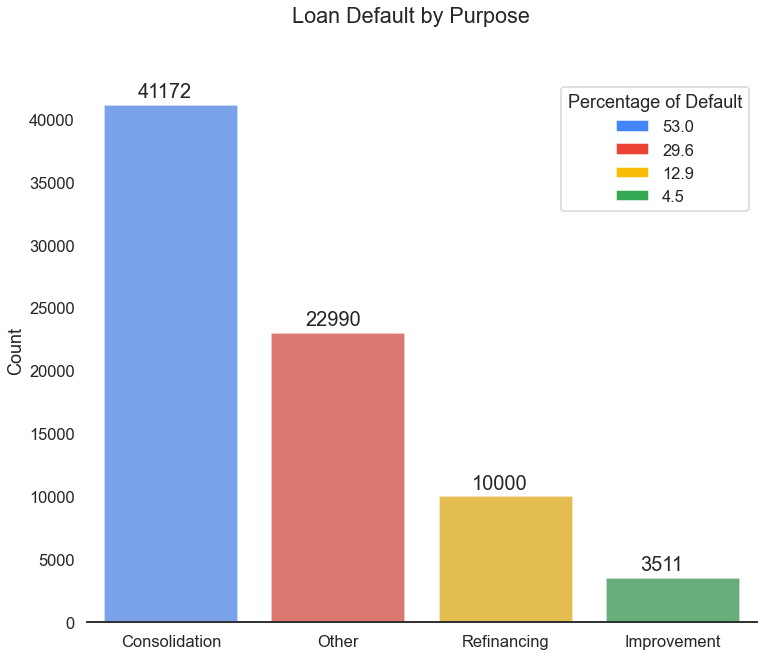

In [34]:
fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(x='index', y='title', data=data_title, palette=['#4285FA', '#EA4335', '#FBBC05', '#34A853'], alpha=0.8)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+600, str(int(i.get_height())), fontsize=20)

patches = [Patch(facecolor='#4285FA', label=data_title.iloc[0,2]),
           Patch(facecolor='#EA4335', label=data_title.iloc[1,2]),
           Patch(facecolor='#FBBC05', label=data_title.iloc[2,2]),
           Patch(facecolor='#34A853', label=data_title.iloc[3,2])]


ax.set_xlabel('')
ax.set_ylabel('Count')
fig.suptitle('Loan Default by Purpose')
ax.legend(handles=patches, title='Percentage of Default')
sns.despine(left=True)

In [35]:
# we could use apply function for 1 line of code, However, it is hard to read
# df1['title'] = df1['title'].apply(lambda x: "Consolidation" if ("C" in x.lower()) \
#                                                             else ('R' if ('refinancing' in x.lower()) \
#                                                             else ('I' if ('improvement' in x.lower()) \
#                                                             else "O"))

In [36]:
# Remove emp_title columns with tremedous number of unique values. We will save it in an object
#for further analysis
title_categories = df['emp_title']

In [37]:
df.drop(['emp_title', 'address'], axis=1, inplace=True)

In [38]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                115
purpose                 14
title                    4
earliest_cr_line       684
initial_list_status      2
application_type         3
dtype: int64

In [39]:
df.earliest_cr_line.unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [40]:
df.issue_d.unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [41]:
# Issue date and earliest credit line seem to be inrelevant to our model. Therefore, we will drop
# these 2 columns
df.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [42]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
purpose                14
title                   4
initial_list_status     2
application_type        3
dtype: int64

In [43]:
df.term

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 396030, dtype: object

In [44]:
df['term'] = df['term'].str.strip('months')
df['term'] = df.term.astype('int')  

In [45]:
df.rename(columns={'term': 'term_by_month'}, inplace=True)

In [46]:
df.term_by_month.value_counts()

36    302005
60     94025
Name: term_by_month, dtype: int64

In [47]:
df.groupby('term_by_month')['is_default'].count()

term_by_month
36    302005
60     94025
Name: is_default, dtype: int64

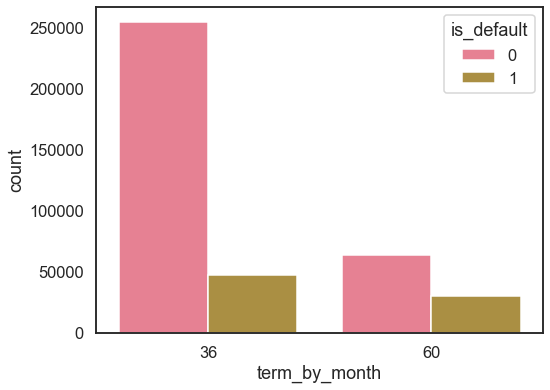

In [48]:
plt.figure(figsize=(8,6))
sns.countplot('term_by_month', hue='is_default', data=df)


In [49]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

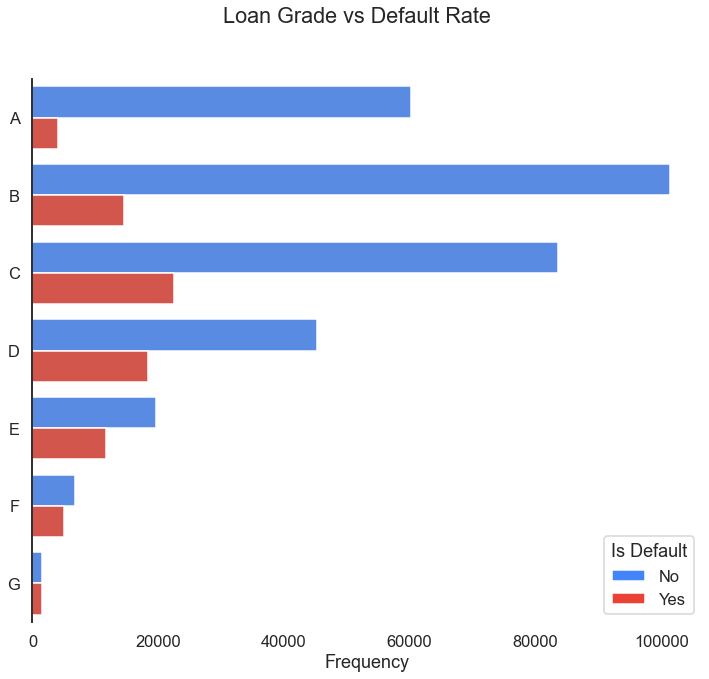

In [50]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(y='grade', hue='is_default', data=df, palette={0:Blue, 1:Red},
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set_xlabel('Frequency')
ax.set_ylabel('')
fig.suptitle('Loan Grade vs Default Rate')
patches = [Patch(facecolor=Blue, label='No'), Patch(facecolor=Red, label='Yes')]
ax.legend(handles=patches, title='Is Default')
sns.despine(bottom=True)

In [51]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

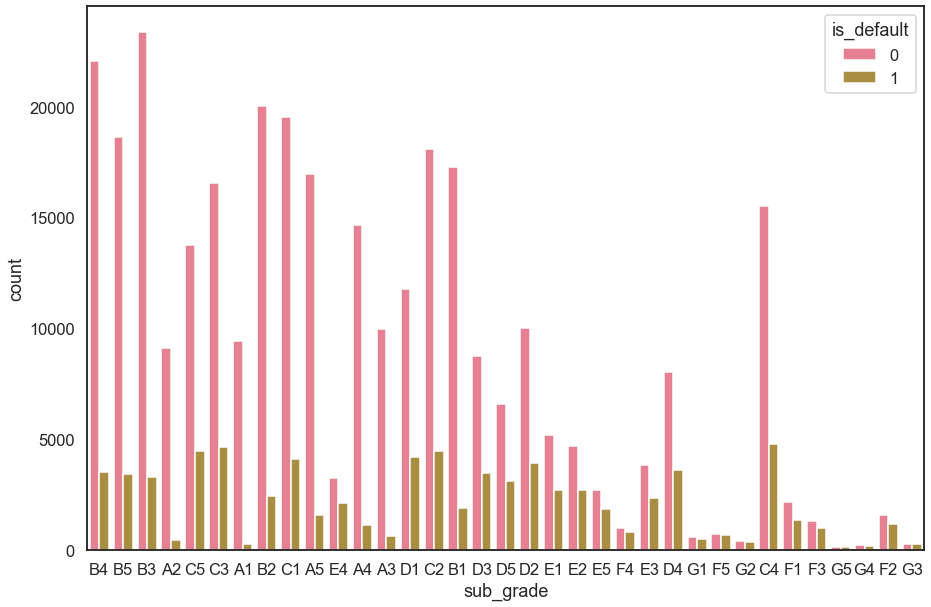

In [52]:
plt.figure(figsize=(15,10))
sns.countplot('sub_grade', hue='is_default', data=df)

In [53]:
# We will remove the sub_grade column since it is a subclass from grade
df.drop('sub_grade', axis=1, inplace=True)

In [54]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

grade                   7
emp_length             11
home_ownership          6
verification_status     3
purpose                14
title                   4
initial_list_status     2
application_type        3
dtype: int64

In [55]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [56]:
df['emp_length'] = df.emp_length.str.strip('years').str.strip(' + ').str.strip(' < ')

In [57]:
df.rename(columns={'emp_length': 'emp_length_years'}, inplace=True)

In [58]:
df.emp_length_years.value_counts(dropna=False)

10     126041
1       57607
2       35827
3       31665
5       26495
4       23952
6       20841
7       20819
8       19168
NaN     18301
9       15314
Name: emp_length_years, dtype: int64

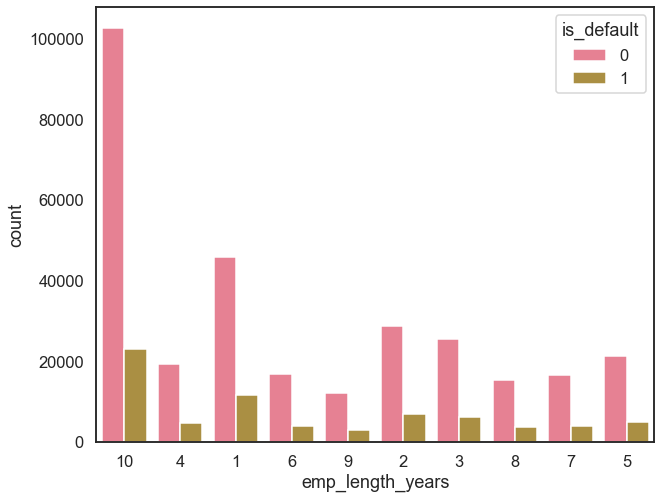

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='emp_length_years', hue='is_default', data=df)

In [60]:
df.groupby('is_default')['emp_length_years'].value_counts(dropna=False)

is_default  emp_length_years
0           10                  102826
            1                    45890
            2                    28903
            3                    25483
            5                    21403
            4                    19344
            6                    16898
            7                    16764
            8                    15339
            NaN                  13263
            9                    12244
1           10                   23215
            1                    11717
            2                     6924
            3                     6182
            5                     5092
            NaN                   5038
            4                     4608
            7                     4055
            6                     3943
            8                     3829
            9                     3070
Name: emp_length_years, dtype: int64

In [61]:
df['emp_length_years'].fillna(0, inplace=True)

In [62]:
df['emp_length_years'] = df.emp_length_years.astype('int')

In [63]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

grade                   7
home_ownership          6
verification_status     3
purpose                14
title                   4
initial_list_status     2
application_type        3
dtype: int64

In [64]:
df.grade

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [65]:
from category_encoders import TargetEncoder

In [66]:
encoder = TargetEncoder()
df['purpose_encoder'] = encoder.fit_transform(df.purpose, df.is_default)

In [67]:
encoder1 = TargetEncoder()
df['grade_encoder'] = encoder1.fit_transform(df.grade, df.is_default)

In [68]:
encoder2 = TargetEncoder()
df['home_ownership_encoder'] = encoder2.fit_transform(df.home_ownership, df.is_default)

In [69]:
encoder3 = TargetEncoder()
df['title_encoder'] = encoder3.fit_transform(df.title, df.is_default)

In [70]:
df.head()

,loan_amnt,term_by_month,int_rate,installment,grade,emp_length_years,home_ownership,annual_inc,verification_status,is_default,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,purpose_encoder,grade_encoder,home_ownership_encoder,title_encoder
0,10000.0,36,11.44,329.48,B,10,RENT,117000.0,Not Verified,0,vacation,Other,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0.189233,0.125730,0.226622,0.173558
1,8000.0,36,11.99,265.68,B,4,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,Consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0.207414,0.125730,0.169561,0.214276
2,15600.0,36,10.49,506.97,B,1,RENT,43057.0,Source Verified,0,credit_card,Refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0.167118,0.125730,0.226622,0.191366
3,7200.0,36,6.49,220.65,A,6,RENT,54000.0,Not Verified,0,credit_card,Refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0.167118,0.062879,0.226622,0.191366
4,24375.0,60,17.27,609.33,C,9,MORTGAGE,55000.0,Verified,1,credit_card,Other,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0.167118,0.211809,0.169561,0.173558


In [71]:
df.drop(['grade', 'home_ownership', 'purpose', 'title'], axis=1, inplace=True)

In [72]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

verification_status    3
initial_list_status    2
application_type       3
dtype: int64

In [73]:
# The remaining categories columns have less than 3 values. Therefore, we can do one-hot encoding
df = pd.get_dummies(df)

In [74]:
df.dtypes

loan_amnt                              float64
term_by_month                            int32
int_rate                               float64
installment                            float64
emp_length_years                         int32
annual_inc                             float64
is_default                               int64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                               float64
pub_rec_bankruptcies                   float64
purpose_encoder                        float64
grade_encoder                          float64
home_ownership_encoder                 float64
title_encoder                          float64
verification_status_Not Verified         uint8
verification_status_Source Verified      uint8
verification_

In [75]:
abs(df.corr()['is_default']).sort_values(ascending=False)

is_default                             1.000000
grade_encoder                          0.257886
int_rate                               0.247758
term_by_month                          0.173246
verification_status_Not Verified       0.085163
revol_util                             0.082373
mort_acc                               0.073111
home_ownership_encoder                 0.068543
dti                                    0.062413
loan_amnt                              0.059836
purpose_encoder                        0.059394
annual_inc                             0.053432
verification_status_Verified           0.050314
title_encoder                          0.046525
installment                            0.041082
verification_status_Source Verified    0.033030
open_acc                               0.028012
emp_length_years                       0.027305
pub_rec                                0.019933
total_acc                              0.017893
revol_bal                              0

In [76]:
df.isnull().sum()

loan_amnt                                  0
term_by_month                              0
int_rate                                   0
installment                                0
emp_length_years                           0
annual_inc                                 0
is_default                                 0
dti                                        0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               276
total_acc                                  0
mort_acc                               37795
pub_rec_bankruptcies                     535
purpose_encoder                            0
grade_encoder                              0
home_ownership_encoder                     0
title_encoder                              0
verification_status_Not Verified           0
verification_status_Source Verified        0
verification_status_Verified               0
initial_li

In [77]:
df.mort_acc.unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [78]:
df.groupby('is_default')['mort_acc'].mean()

is_default
0    1.892836
1    1.501213
Name: mort_acc, dtype: float64

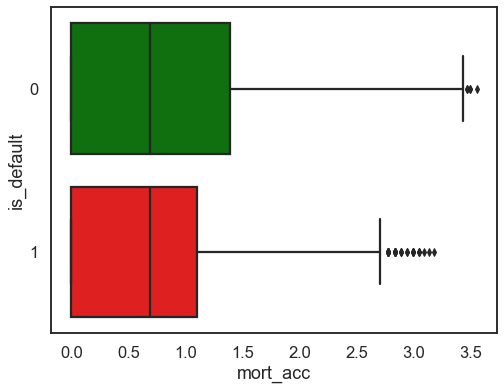

In [79]:
plt.figure(figsize=(8,6))
sns.boxplot(np.log(df.mort_acc+1), 'is_default', data=df, orient='h', palette={0:'green', 1:'red'})

In [80]:
# drop mort_acc
df.drop('mort_acc', axis=1, inplace=True)

In [81]:
df.revol_util

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [82]:
df.revol_util.unique()

array([ 41.8 ,  53.3 ,  92.2 , ...,  56.26, 111.4 , 128.1 ])

In [83]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [84]:
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.fillna(0)

In [85]:
df.drop('revol_util', axis=1, inplace=True)

In [86]:
df.dtypes

loan_amnt                              float64
term_by_month                            int32
int_rate                               float64
installment                            float64
emp_length_years                         int32
annual_inc                             float64
is_default                               int64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
total_acc                              float64
pub_rec_bankruptcies                   float64
purpose_encoder                        float64
grade_encoder                          float64
home_ownership_encoder                 float64
title_encoder                          float64
verification_status_Not Verified         uint8
verification_status_Source Verified      uint8
verification_status_Verified             uint8
initial_list_status_f                    uint8
initial_list_

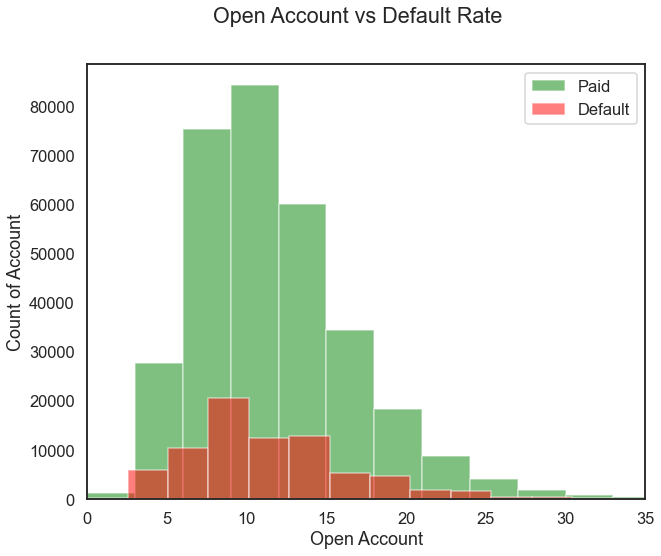

In [88]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(df[df.is_default==0]['open_acc'], bins=30, alpha=0.5, color='g', label='Paid')
ax.hist(df[df.is_default==1]['open_acc'], bins=30, alpha=0.5, color='r', label='Default')
ax.set_xlabel('Open Account')
ax.set_ylabel('Count of Account')
ax.set_xlim([0,35])
fig.suptitle('Open Account vs Default Rate')
ax.legend()

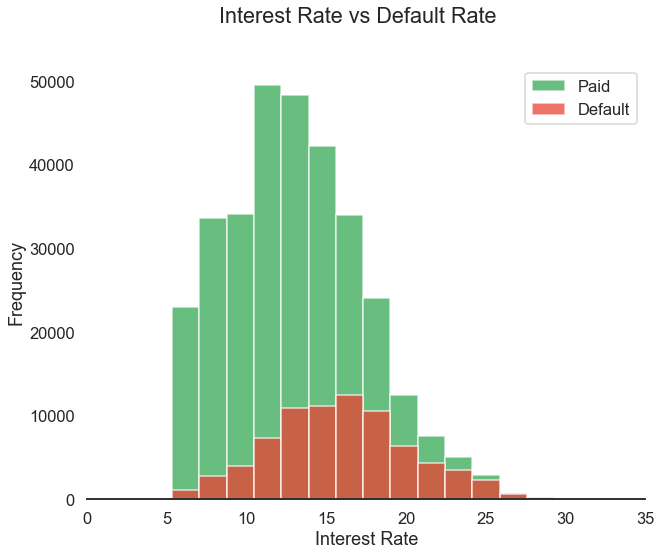

In [89]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(df[df.is_default==0]['int_rate'], bins=15, alpha=0.75, color=Green, label='Paid')
ax.hist(df[df.is_default==1]['int_rate'], bins=15, alpha=0.75, color=Red, label='Default')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Frequency')
ax.set_xlim([0,35])
fig.suptitle('Interest Rate vs Default Rate')
ax.legend()
sns.despine(left=True)


### Examine DTI & revol_bal

In [120]:
# find outliers in revol_bal 
Q1 = df.revol_bal.quantile(0.25)
Q3 = df.revol_bal.quantile(0.75)
IQR = Q3-Q1 

revol = df[(df.revol_bal > (Q1 - 1.5*IQR)) & ( df.revol_bal < (Q3 + 1.5*IQR))]

In [122]:
revol.revol_bal.max()

40012.0

In [123]:
revol.revol_bal.min()

0.0

In [124]:
df.revol_bal.max()

1743266.0

In [125]:
df.revol_bal.min()

0.0

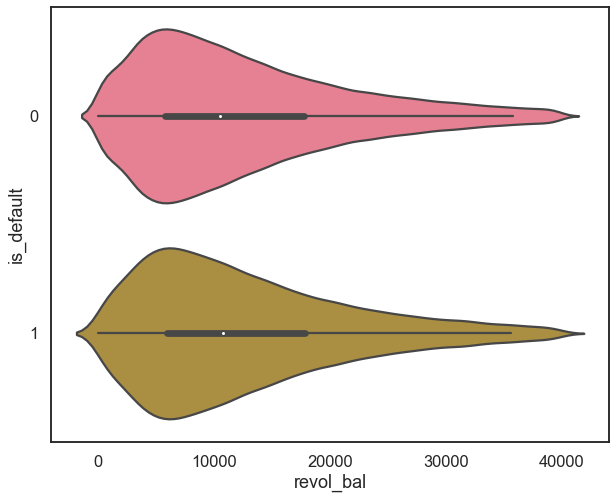

In [130]:
plt.figure(figsize=(10,8))
sns.violinplot(revol.revol_bal, 'is_default', data=df, orient='h')

In [90]:
df.loc[df.dti==9999, 'dti'] = 0

In [91]:
df.loc[df.dti==1622, 'dti'] = 0

In [92]:
df.nlargest(5, 'dti')

,loan_amnt,term_by_month,int_rate,installment,emp_length_years,annual_inc,is_default,dti,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,purpose_encoder,grade_encoder,home_ownership_encoder,title_encoder,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
338571,19000.0,60,16.99,472.10,1,5000.0,0,380.53,25.0,0.0,19104.0,62.0,0.0,0.212178,0.288678,0.169561,0.173558,0,1,0,1,0,0,0,1
7011,18375.0,60,26.24,552.77,0,2500.0,0,189.90,5.0,0.0,1773.0,18.0,0.0,0.207414,0.373634,0.169561,0.214276,1,0,0,0,1,0,0,1
36015,15100.0,60,9.75,318.98,3,8000.0,0,145.65,17.0,0.0,13796.0,35.0,0.0,0.207414,0.125730,0.169561,0.214276,0,1,0,0,1,0,0,1
296164,14000.0,36,11.49,461.60,4,16000.0,0,138.03,14.0,0.0,30504.0,36.0,0.0,0.207414,0.125730,0.169561,0.214276,0,1,0,0,1,0,0,1
294182,15000.0,36,15.41,523.00,0,8700.0,0,120.66,16.0,1.0,7332.0,26.0,1.0,0.207414,0.288678,0.169561,0.214276,0,1,0,1,0,0,0,1


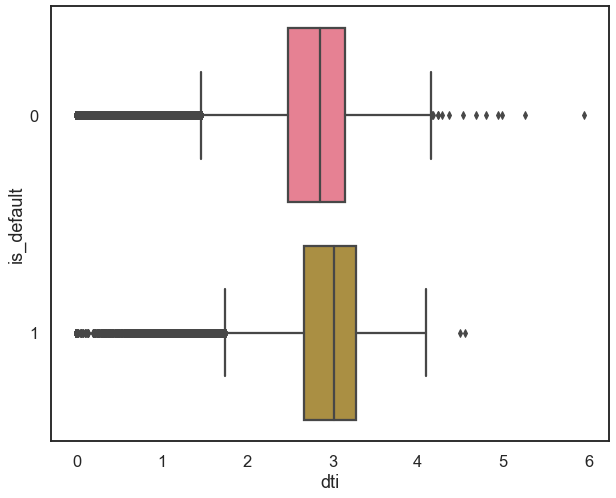

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(np.log(df.dti+1), 'is_default', data=df, orient='h')

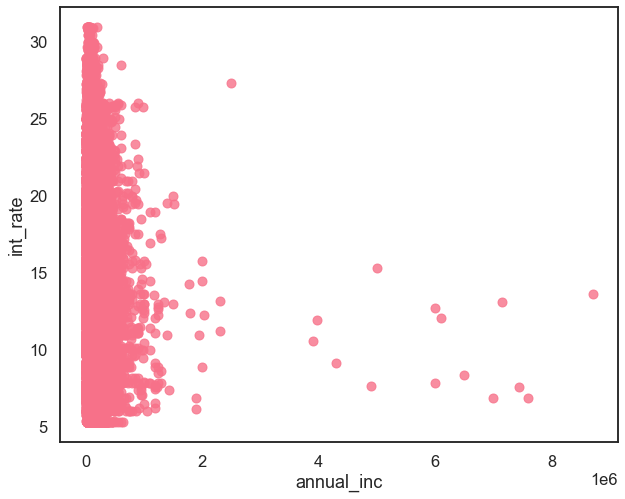

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='annual_inc', y='int_rate', data=df, fit_reg=False )

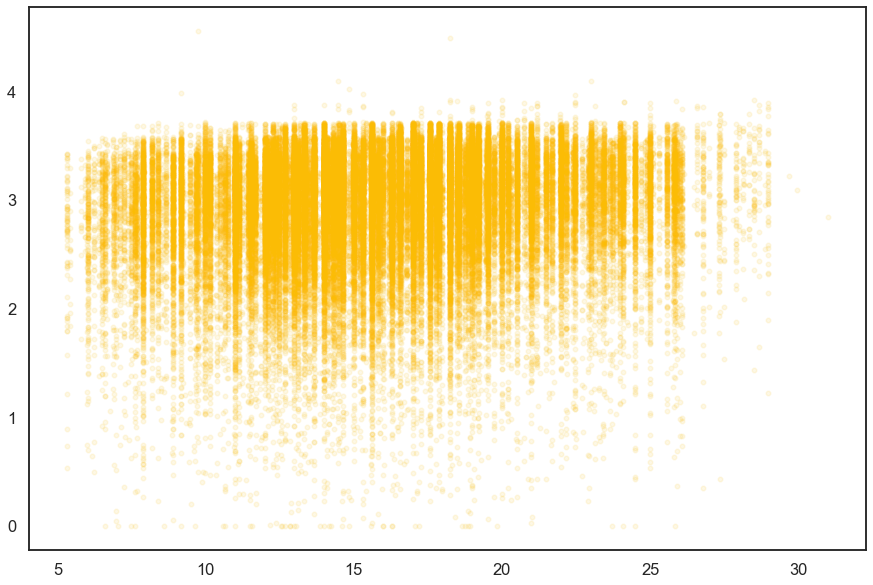

In [95]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(df[df.is_default ==1]['int_rate'], np.log(df[df.is_default==1]['dti']+1), c=Yellow, marker='.', alpha=0.1)

In [96]:
df.isnull().sum()

loan_amnt                              0
term_by_month                          0
int_rate                               0
installment                            0
emp_length_years                       0
annual_inc                             0
is_default                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
total_acc                              0
pub_rec_bankruptcies                   0
purpose_encoder                        0
grade_encoder                          0
home_ownership_encoder                 0
title_encoder                          0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_f                  0
initial_list_status_w                  0
application_type_DIRECT_PAY            0
application_type_INDIVIDUAL            0
application_type

In [97]:
d = abs(df.corr()['is_default']).drop('is_default')
d

loan_amnt                              0.059836
term_by_month                          0.173246
int_rate                               0.247758
installment                            0.041082
emp_length_years                       0.027305
annual_inc                             0.053432
dti                                    0.131784
open_acc                               0.028012
pub_rec                                0.019933
revol_bal                              0.010892
total_acc                              0.017893
pub_rec_bankruptcies                   0.009416
purpose_encoder                        0.059394
grade_encoder                          0.257886
home_ownership_encoder                 0.068543
title_encoder                          0.046525
verification_status_Not Verified       0.085163
verification_status_Source Verified    0.033030
verification_status_Verified           0.050314
initial_list_status_f                  0.009489
initial_list_status_w                  0

In [98]:
df.to_csv('Clean_LoanData.csv')

### Skew Data and QuantileTransformer

In [99]:
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer

In [100]:
print(skew(df.is_default), skew(df.grade_encoder), skew(df.int_rate), skew(df.dti), skew(df.term_by_month))

1.5305762816696227 0.5873224936601646 0.420667878632277 0.5312922832642022 1.2342207290375684


In [101]:
data = df.drop('is_default', axis=1)
target = df['is_default']
qt = QuantileTransformer(n_quantiles=10, output_distribution='normal', random_state=1)
df1 = pd.DataFrame(qt.fit_transform(data), columns=data.columns)

In [102]:
df2 = pd.concat([df1, target], axis=1)

In [103]:
df2.head()

,loan_amnt,term_by_month,int_rate,installment,emp_length_years,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,purpose_encoder,grade_encoder,home_ownership_encoder,title_encoder,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,is_default
0,-0.350550,-5.199338,-0.448656,-0.219462,5.199338,1.157771,1.007304,0.967422,-5.199338,1.223491,0.139710,-5.199338,-0.573355,-0.430727,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,0
1,-0.628136,-5.199338,-0.326418,-0.572266,-0.282216,0.034821,0.563946,1.085325,-5.199338,0.693331,0.282216,-5.199338,0.282216,-0.430727,-0.589456,5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,0
2,0.370364,-5.199338,-0.648604,0.465436,-1.220640,-0.791770,-0.483434,0.430727,-5.199338,0.074196,0.210428,-5.199338,-0.967422,-0.430727,5.199338,-0.139710,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,0
3,-0.736316,-5.199338,-1.641107,-0.832631,0.000000,-0.330873,-1.757552,-1.220640,-5.199338,-0.770259,-1.085325,-5.199338,-0.967422,-5.199338,5.199338,-0.139710,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,0
4,1.150349,5.199338,0.813098,0.780994,0.430727,-0.298355,1.306050,0.430727,-5.199338,0.915791,1.236652,-5.199338,-0.967422,0.282216,-0.589456,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,1


In [104]:
print(skew(df2.is_default), skew(df2.grade_encoder), skew(df2.int_rate), skew(df2.dti), skew(df2.term_by_month))

1.5305762816696227 -1.3195483547857856 -0.9188717380765922 -0.35588403775641336 1.2342207290375686


### Instantiate X, y

In [105]:
X = df2.drop('is_default', axis=1)
y = df2['is_default']
print(X.shape, y.shape)

(396030, 24) (396030,)


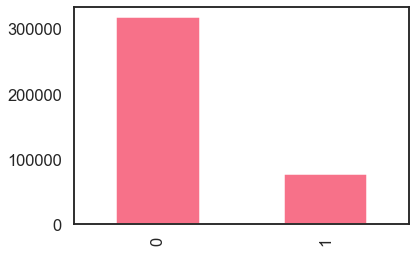

In [106]:
df2.is_default.value_counts().plot.bar()

### Imbalanced Data resampling

In [107]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [108]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(X.shape, y.shape)

(636714, 24) (636714,)


In [109]:
counter = Counter(y)
for i, v in counter.items():
    per = 100* v / len(y)
    print(f'Value:{i}, Count:{v}, Percentage:{per}')

Value:0, Count:318357, Percentage:50.0
Value:1, Count:318357, Percentage:50.0


<BarContainer object of 2 artists>

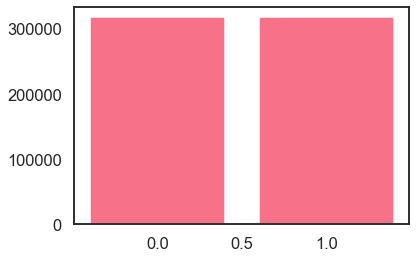

In [110]:
plt.bar(counter.keys(), counter.values())

### Scaling Data

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split Data

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

### LogisticRegression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
pd.DataFrame(classification_report(y_test, logreg_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.661168,0.638786,0.649784,63688.000000
1,0.650438,0.672469,0.661270,63655.000000
accuracy,0.655623,0.655623,0.655623,0.655623
macro avg,0.655803,0.655627,0.655527,127343.000000
weighted avg,0.655805,0.655623,0.655526,127343.000000


In [117]:
confusion_matrix(y_test, logreg_pred)

array([[40683, 23005],
       [20849, 42806]], dtype=int64)

In [118]:
#FP = 23089
#TP = 42894
#precision = TP / (TP+FP)
#print(f'Model Performance: {precision}')

In [119]:
#TN = 40599
#FN = 20761
#recall = TP / (TP+FN)
#specificity = TN / (TN+FP)
#print(f'Correctly identify {recall} of Actual default')
#print(f'Specificity: {specificity}')

#### Since, we are detecting loan' defaults. we would pay attention to model's precision (aka. the False Positive, client that the model predicted Fully Paid, but it is a charged off)

However, if the goal of the model is to predict covid19-test. It is extremely crucial to identify patients with positive test result. Therefore,  we would want to improve our recall (aka. reduce False Negative, client that the model predicted as negative result, while they do have covid19) 

### Stochastic Gradient Descent (aka. Linear SVM)

In [120]:
from sklearn.linear_model import SGDClassifier

In [121]:
sgd = SGDClassifier(random_state=1)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
pd.DataFrame(classification_report(y_test, sgd_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.643610,0.678495,0.660593,63688.000000
1,0.659884,0.624099,0.641493,63655.000000
accuracy,0.651304,0.651304,0.651304,0.651304
macro avg,0.651747,0.651297,0.651043,127343.000000
weighted avg,0.651745,0.651304,0.651045,127343.000000


In [122]:
confusion_matrix(y_test, sgd_pred)

array([[43212, 20476],
       [23928, 39727]], dtype=int64)

### K-nearest Neighbors (non-Linear)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
pd.DataFrame(classification_report(y_test, kn_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.902834,0.614794,0.731479,63688.000000
1,0.707850,0.933799,0.805275,63655.000000
accuracy,0.774255,0.774255,0.774255,0.774255
macro avg,0.805342,0.774297,0.768377,127343.000000
weighted avg,0.805367,0.774255,0.768368,127343.000000


In [125]:
confusion_matrix(y_test, kn_pred)

array([[39155, 24533],
       [ 4214, 59441]], dtype=int64)

### Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
pd.DataFrame(classification_report(y_test, rfc_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.848430,0.912574,0.879334,63688.00000
1,0.905370,0.836886,0.869782,63655.00000
accuracy,0.874740,0.874740,0.874740,0.87474
macro avg,0.876900,0.874730,0.874558,127343.00000
weighted avg,0.876893,0.874740,0.874559,127343.00000


In [128]:
confusion_matrix(y_test, rfc_pred)

array([[58120,  5568],
       [10383, 53272]], dtype=int64)

In [129]:
df2.columns[:-1]

Index(['loan_amnt', 'term_by_month', 'int_rate', 'installment',
       'emp_length_years', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 'purpose_encoder',
       'grade_encoder', 'home_ownership_encoder', 'title_encoder',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

In [130]:
b = df2.columns[:-1]
b

Index(['loan_amnt', 'term_by_month', 'int_rate', 'installment',
       'emp_length_years', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 'purpose_encoder',
       'grade_encoder', 'home_ownership_encoder', 'title_encoder',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

In [131]:
a = rfc.feature_importances_
a

array([6.86310888e-02, 1.64675521e-02, 1.24947538e-01, 6.92839826e-02,
       5.59512218e-02, 8.32756155e-02, 8.04219334e-02, 8.78770520e-02,
       1.04271532e-02, 7.45807017e-02, 7.23649766e-02, 6.57112860e-03,
       3.08280353e-02, 1.24949099e-01, 3.43699382e-02, 1.82350177e-02,
       8.00785242e-03, 8.08224137e-03, 7.81347114e-03, 8.19632843e-03,
       8.22898267e-03, 9.78059688e-05, 2.32592674e-04, 1.58690952e-04])

In [132]:
c = pd.DataFrame([b,a,d]).T

In [133]:
# Table of feature important by RFC and correlation
c.rename(columns={0:'column', 1:'rfc', 2:'correlation'}, inplace=True)
c.sort_values('rfc', ascending=False)

,column,rfc,correlation
13,grade_encoder,0.124949,0.257886
2,int_rate,0.124948,0.247758
7,open_acc,0.0878771,0.028012
5,annual_inc,0.0832756,0.0534324
6,dti,0.0804219,0.131784
9,revol_bal,0.0745807,0.0108923
10,total_acc,0.072365,0.0178926
3,installment,0.069284,0.0410821
0,loan_amnt,0.0686311,0.059836
4,emp_length_years,0.0559512,0.0273047


### Neural Networks

In [134]:
from sklearn.neural_network import MLPClassifier

In [135]:
neu = MLPClassifier()
neu.fit(X_train, y_train)
neu_pred = neu.predict(X_test)
pd.DataFrame(classification_report(y_test, neu_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.674153,0.708893,0.691087,63688.000000
1,0.692909,0.657183,0.674573,63655.000000
accuracy,0.683045,0.683045,0.683045,0.683045
macro avg,0.683531,0.683038,0.682830,127343.000000
weighted avg,0.683528,0.683045,0.682832,127343.000000


In [136]:
confusion_matrix(y_test, neu_pred)

array([[45148, 18540],
       [21822, 41833]], dtype=int64)

### ROC Curve

In [137]:
from sklearn.metrics import roc_curve, auc

In [138]:
# Logistic Regression Proba
logreg_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, logreg_prob)
logreg_auc = auc(fpr, tpr)

In [139]:
# K-nearest neighbors Proba
kn_prob = kn.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, kn_prob)
kn_auc = auc(fpr1, tpr1)

In [140]:
# RandomForest Proba
rfc_prob = rfc.predict_proba(X_test)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, rfc_prob)
rfc_auc = auc(fpr2, tpr2)

In [141]:
# Neural networks Proba
neu_prob = neu.predict_proba(X_test)[:,1]
fpr3, tpr3, threshold3 = roc_curve(y_test, neu_prob)
neu_auc = auc(fpr3, tpr3)

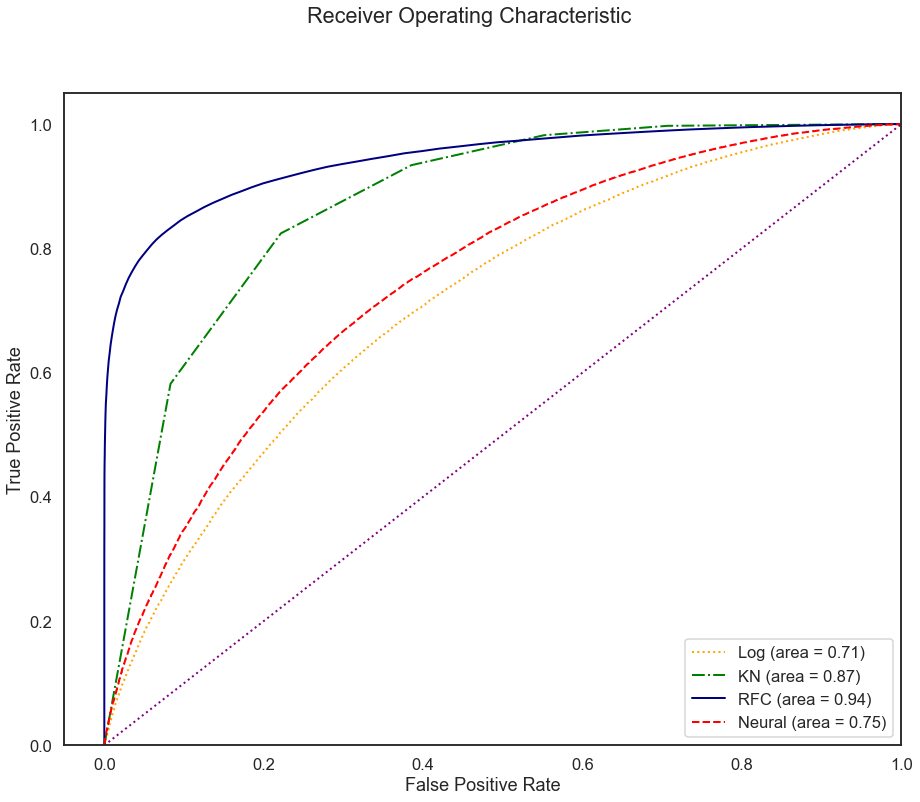

In [142]:
sns.set_style('white')
plt.figure(figsize=(15,12))
plt.plot(fpr, tpr, lw=2, color='orange', label='Log (area = %.2f)' %logreg_auc, linestyle=':')
plt.plot(fpr1, tpr1, lw=2, color='g', label='KN (area = %.2f)' %kn_auc, linestyle='-.')
plt.plot(fpr2, tpr2, lw=2, color='navy', label='RFC (area = %.2f)' %rfc_auc)
plt.plot(fpr3, tpr3, lw=2, color='r', label='Neural (area = %.2f)' %neu_auc, linestyle='--')
         

plt.plot([0,1], [0,1], lw=2, color='purple', linestyle=':')
plt.xlim([-0.05,1]), plt.ylim([0,1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [143]:
# Simplified Model with 7 features
X_1 = df2[['grade_encoder', 'int_rate', 'open_acc', 'dti', 'annual_inc', 'revol_bal', 'total_acc']]
y_1 = df2['is_default']
print(X_1.shape, y_1.shape)

(396030, 7) (396030,)


In [144]:
oversample = SMOTE()
X_1, y_1 = oversample.fit_resample(X_1, y_1)
print(X_1.shape, y_1.shape)

(636714, 7) (636714,)


In [145]:
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_1, y_1, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(509371, 24) (127343, 24)
(509371,) (127343,)


In [147]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
pd.DataFrame(classification_report(y_test, rfc_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.847195,0.912150,0.878473,63688.000000
1,0.904802,0.835394,0.868714,63655.000000
accuracy,0.873782,0.873782,0.873782,0.873782
macro avg,0.875998,0.873772,0.873593,127343.000000
weighted avg,0.875991,0.873782,0.873595,127343.000000


In [148]:
print(rfc.score(X_test, y_test))

0.8737818333163189


In [149]:
cm = confusion_matrix(y_test, rfc_pred)
cm

array([[58093,  5595],
       [10478, 53177]], dtype=int64)

Text(103.5, 0.5, 'Actual')

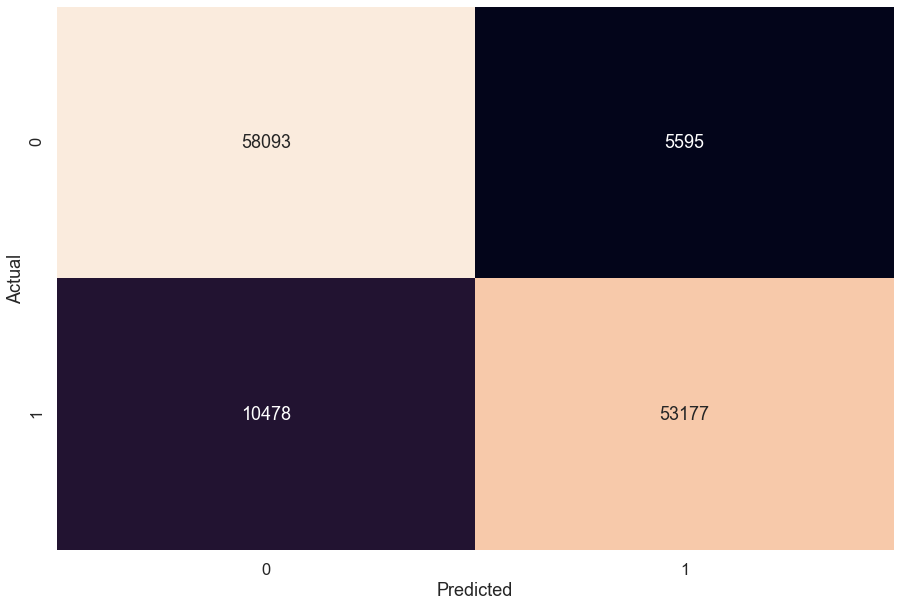

In [150]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cbar=False, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Hyperparameters on Random Forest

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [153]:
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                n_iter=10, cv=5, verbose=2, random_state=1, n_jobs=-1)

__Conclusion:__<br> I was be able to develop a model to predict the default rate of lender(borrower) based on 7 key features of the Lending Club's dataset.<br> 
__Features:__ Grade, interest rate, open account, debts to income ratio, annual income, revol balance, total account<br>
The Random Forest Classifier scored the top accuracy at 87% with the least False Positive among other model at 6854 (FP).<br> Also, within my finding, if the loan's title is in the consolidation category. There is a high chance that the loan will result in a default.   